# Part 1

## Part 1.1

![Final Project Screenshot 1.png](./Final Project Screenshot 1.png "Final Project Screenshot 1.png")![Final Project Screenshot 2.png](./Final Project Screenshot 2.png "Final Project Screenshot 2.png")

In [0]:
%sql
SHOW TABLES IN bigquery_connection_catalog.voterfile;


database,tableName,isTemporary
voterfile,ak_table,false
voterfile,employees,false


## Part 1.2 Shell Script in Cloud Shell

![Final Project Screenshot 3.png](./Final Project Screenshot 3.png "Final Project Screenshot 3.png")

This shell script defines a Bash array called states that contains the two-letter abbreviations for all 50 U.S. states and the District of Columbia (DC). The script uses echo to print a single example state (${states[1]} = AL) and the full list of state abbreviations (${states[@]}) This confirms that the array is correctly formed and can be used later to iterate through each state and run queries. The script was run in Google Cloud Shell, and the output was captured as a screenshot for submission.

## 1.3. Voter Turnout Query

![Final Project Screenshot 4.png](./Final Project Screenshot 4.png "Final Project Screenshot 4.png")

![Final Project Screenshot 5.png](./Final Project Screenshot 5.png "Final Project Screenshot 5.png")![Final Project Screenshot 6.png](./Final Project Screenshot 6.png "Final Project Screenshot 6.png")

The notebook is running on the BigQuery compute engine in the US region. I determined this by clicking the job status line below the query output, which revealed the compute backend and region. On the “Open Job” page, I learned more about the execution details such as how many bytes were processed, whether results were cached, and the time taken. This information helps assess the performance and cost of queries.

In Step 1.2, using Cloud Shell with a bash script was fast, scriptable, and ideal for automating repetitive tasks like querying all 50 state tables. It’s great for batch jobs or headless processing. However, it lacked visualization and was harder to debug or explore interactively.

In Step 1.3, using a BigQuery Notebook allowed for rich interactivity, seamless integration of SQL and Python, and immediate data visualization using bigframes. It made it easy to explore, transform, and plot data. The con is that it depends on runtime availability and requires more configuration to get started (e.g., project setup, permissions).

Overall, Step 1.2 is better for scripting and automation, while Step 1.3 is better for analysis, exploration, and visualization.


# Part 2

## Parts 2.1 and 2.2

For the state, we ended up choosing Alaska as our state for the project. We will be exploring its voter data and demographics.

In [0]:
_sqldf.write.format("parquet") \
    .option("compression", "snappy") \
    .mode("overwrite") \
    .save("/Volumes/assignment2/default/voterfile-export/state")


In [0]:
%sql
CREATE TABLE IF NOT EXISTS state (
  -- define schema explicitly if needed
)
USING PARQUET;

COPY INTO state
FROM '/Volumes/assignment2/default/voterfile-export/state/'
FILEFORMAT = PARQUET;





num_affected_rows,num_inserted_rows,num_skipped_corrupt_files
1,1,0


In [0]:
%sql
CREATE OR REPLACE TEMP VIEW ak_tmp AS
SELECT * FROM bigquery_connection_catalog.voterfile.ak_table;

SELECT COUNT(*) FROM ak_tmp;

count(1)
548259


## Part 2.3

### Part 1: 6 different Pyspark Pandas APIs to perform various data exploration tasks.

In [0]:
print(ak.columns)

Index(['SEQUENCE', 'LALVOTERID', 'Voters_Active', 'Voters_StateVoterID',
       'Voters_CountyVoterID', 'VoterTelephones_LandlineAreaCode',
       'VoterTelephones_Landline7Digit', 'VoterTelephones_LandlineFormatted',
       'VoterTelephones_LandlineUnformatted',
       'VoterTelephones_LandlineConfidenceCode',
       ...
       'PRI_BLT_2009', 'PRI_BLT_2008', 'PRI_BLT_2007', 'PRI_BLT_2006',
       'PRI_BLT_2005', 'PRI_BLT_2004', 'PRI_BLT_2003', 'PRI_BLT_2002',
       'PRI_BLT_2001', 'PRI_BLT_2000'],
      dtype='object', length=726)


In [0]:
import pyspark.pandas as ps

ak_spark_df = spark.table("assignment2.default.ak")

# Convert to pandas-on-Spark DataFrame
ak = ak_spark_df.pandas_api()

# head() function
ak.head(5)

,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,VoterTelephones_CellPhoneOnly,VoterTelephones_CellPhoneFormatted,VoterTelephones_CellPhoneUnformatted,VoterTelephones_CellConfidenceCode,Voters_FirstName,Voters_MiddleName,Voters_LastName,Voters_NameSuffix,Residence_Addresses_AddressLine,Residence_Addresses_ExtraAddressLine,Residence_Addresses_City,Residence_Addresses_State,Residence_Addresses_Zip,Residence_Addresses_ZipPlus4,Residence_Addresses_HouseNumber,Residence_Addresses_PrefixDirection,Residence_Addresses_StreetName,Residence_Addresses_Designator,Residence_Addresses_SuffixDirection,Residence_Addresses_ApartmentNum,Residence_Addresses_ApartmentType,Residence_Addresses_CassErrStatCode,Voters_SequenceZigZag,Voters_SequenceOddEven,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlockGroup,Residence_Addresses_CensusBlock,Residence_Addresses_Latitude,Residence_Addresses_Longitude,Residence_Addresses_LatLongAccuracy,Residence_Addresses_Property_LandSq_Footage,Residence_Addresses_Property_HomeSq_Footage,Residence_Addresses_Density,Residence_Families_FamilyID,Residence_Families_HHCount,Residence_HHGender_Description,Residence_HHParties_Description,Mailing_Addresses_AddressLine,Mailing_Addresses_ExtraAddressLine,Mailing_Addresses_City,Mailing_Addresses_State,Mailing_Addresses_Zip,Mailing_Addresses_ZipPlus4,Mailing_Addresses_HouseNumber,Mailing_Addresses_PrefixDirection,Mailing_Addresses_StreetName,Mailing_Addresses_Designator,Mailing_Addresses_SuffixDirection,Mailing_Addresses_ApartmentNum,Mailing_Addresses_ApartmentType,Mailing_Addresses_CassErrStatCode,Mailing_Families_FamilyID,Mailing_Families_HHCount,Mailing_HHGender_Description,Mailing_HHParties_Description,Voters_Gender,Voters_Age,Voters_BirthDate,DateConfidence_Description,Parties_Description,VoterParties_Change_Changed_Party,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CountyEthnic_LALEthnicCode,CountyEthnic_Description,Religions_Description,Voters_CalculatedRegDate,Voters_OfficialRegDate,Voters_PlaceOfBirth,Languages_Description,AbsenteeTypes_Description,MilitaryStatus_Description,MaritalStatus_Description,US_Congressional_District,AddressDistricts_Change_Changed_CD,State_Senate_District,AddressDistricts_Change_Changed_SD,State_House_District,AddressDistricts_Change_Changed_HD,State_Legislative_District,AddressDistricts_Change_Changed_LD,2001_US_Congressional_District,2001_State_Senate_District,2001_State_House_District,2001_State_Legislative_District,County,Voters_FIPS,AddressDistricts_Change_Changed_County,Precinct,County_Commissioner_District,County_Supervisorial_District,County_Legislative_District,City,City_Council_Commissioner_District,City_Ward,City_Mayoral_District,Town_District,Town_Ward,Town_Council,Village,Village_Ward,Township,Township_Ward,Borough,Borough_Ward,Hamlet_Community_Area,4H_Livestock_District,Airport_District,Annexation_District,Aquatic_Center_District,Aquatic_District,Assessment_District,Bay_Area_Rapid_Transit,Board_of_Education_District,Board_of_Education_SubDistrict,Bonds_District,Career_Center,Cemetery_District,Central_Committee_District,Chemical_Control_District,City_School_District,Coast_Water_District,College_Board_District,Committee_Super_District,Communications_District,Community_College,Community_College_Commissioner_District,Community_College_SubDistrict,Community_College_At_Large,Community_Council_District,Community_Council_SubDistrict,Community_Facilities_District,Community_Facilities_SubDistrict,Community_Hospital_District,Community_Planning_Area,Community_Service_District,Community_Service_SubDistrict,Congressional_Township,Conservation_District,Conservation_SubDistrict,Consolidated_Water_District,Control_Zone_District,Corrections_District,County_Board_of_Education_District,County_Board_of_Education_SubDistrict,County_Commun

This command displays the first 5 rows of your PySpark-on-Pandas DataFrame (ak). It helps you get a sense of what the data looks like right after loading it.

In [0]:
ak.describe()

,SEQUENCE,Voters_StateVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,VoterTelephones_CellPhoneUnformatted,VoterTelephones_CellConfidenceCode,Residence_Addresses_Zip,Residence_Addresses_ZipPlus4,Voters_SequenceZigZag,Voters_SequenceOddEven,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlockGroup,Residence_Addresses_CensusBlock,Residence_Addresses_Latitude,Residence_Addresses_Longitude,Residence_Addresses_Property_LandSq_Footage,Residence_Addresses_Property_HomeSq_Footage,Residence_Addresses_Density,Residence_Families_HHCount,Mailing_Addresses_Zip,Mailing_Addresses_ZipPlus4,Mailing_Families_HHCount,Voters_Age,US_Congressional_District,State_House_District,2001_State_House_District,Voters_FIPS,CommercialData_BookBuyerInHome,CommercialData_CulinaryInterestMagazineInHome,CommercialData_DoItYourselferMagazineInHome,CommercialData_FamilyMagazineInHome,CommercialData_FemaleOrientedMagazineInHome,CommercialData_FinancialMagazineInHome,CommercialData_GardeningMagazineInHome,CommercialData_HealthFitnessMagazineInHome,CommercialData_ISPSA,CommercialData_AreaMedianEducationYears,CommercialData_PoliticalContributerInHome,CommercialData_ReligiousContributorInHome,CommercialData_ReligiousMagazineInHome,CommercialData_StateIncomeDecile,CommercialData_UpscaleBuyerInHome,CommercialData_UpscaleFemaleBuyerInHome,CommercialData_UpscaleMaleBuyerInHome,ElectionReturns_G08_Cnty_Vote_McCain_R,ElectionReturns_G08_Cnty_Vote_Obama_D,ElectionReturns_G12_Cnty_Vote_Obama_D,ElectionReturns_G12_Cnty_Vote_Romney_R,ElectionReturns_G16_Cnty_Vote_Clinton_D,ElectionReturns_G16_Cnty_Vote_Trump_R,ElectionReturns_P08_Cnty_Vote_Biden_D,ElectionReturns_P08_Cnty_Vote_Clinton_D,ElectionReturns_P08_Cnty_Vote_Dodd_D,ElectionReturns_P08_Cnty_Vote_Edwards_D,ElectionReturns_P08_Cnty_Vote_Gravel_D,ElectionReturns_P08_Cnty_Vote_Kucinich_D,ElectionReturns_P08_Cnty_Vote_Obama_D,ElectionReturns_P08_Cnty_Vote_Richardson_D,ElectionReturns_P08_Cnty_Vote_Giuliani_R,ElectionReturns_P08_Cnty_Vote_Huckabee_R,ElectionReturns_P08_Cnty_Vote_Hunter_R,ElectionReturns_P08_Cnty_Vote_Keyes_R,ElectionReturns_P08_Cnty_Vote_McCain_R,ElectionReturns_P08_Cnty_Vote_Paul_R,ElectionReturns_P08_Cnty_Vote_Romney_R,ElectionReturns_P08_Cnty_Vote_Thompson_R,ElectionReturns_P12_Cnty_Vote_Bachman_R,ElectionReturns_P12_Cnty_Vote_Gingrich_R,ElectionReturns_P12_Cnty_Vote_Huntsman_R,ElectionReturns_P12_Cnty_Vote_Paul_R,ElectionReturns_P12_Cnty_Vote_Perry_R,ElectionReturns_P12_Cnty_Vote_Romney_R,ElectionReturns_P12_Cnty_Vote_Santorum_R,ElectionReturns_P16_Cnty_Vote_Bush_R,ElectionReturns_P16_Cnty_Vote_Carson_R,ElectionReturns_P16_Cnty_Vote_Christie_R,ElectionReturns_P16_Cnty_Vote_Cruz_R,ElectionReturns_P16_Cnty_Vote_Fiorina_R,ElectionReturns_P16_Cnty_Vote_Kasich_R,ElectionReturns_P16_Cnty_Vote_Rubio_R,ElectionReturns_P16_Cnty_Vote_Trump_R,ElectionReturns_P16_Cnty_Vote_Clinton_D,ElectionReturns_P16_Cnty_Vote_Sanders_D,FECDonors_AvgDonation,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount
count,548259.000000,5.482590e+05,86829.000000,8.682900e+04,86829.000000,1.362390e+05,136239.000000,548167.000000,451108.000000,548259.000000,548259.000000,478455.000000,478455.000000,478455.000000,532146.000000,532146.000000,2.680090e+05,270207.000000,5.010310e+05,548259.000000,548122.000000,539780.000000,548259.000000,332891.000000,548246.0,547902.000000,511091.000000,548259.000000,92246.000000,9773.000000,25297.000000,55739.000000,14476.000000,27548.000000,15293.000000,74513.000000,402435.000000,402435.000000,83650.000000,18048.000000,264.0,402435.000000,6534.000000,37733.000000,14123.000000,422510.000000,422510.000000,422510.000000,422510.000000,422510.000000,422510.000000,422510.0,422510.000000,422510.0,422510.0,422510.0,422510.0,422510.000000,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.0,422510.000000,422510.0,422510.000000,422510.0,4

This command summarizes key descriptive statistics for numeric columns in the dataset. Specifically, .describe() provides the count, mean, standard deviation, minimum, 25th percentile, median (50%), 75th percentile, and maximum values for each column.

In [0]:
import pyspark.pandas as ps

ak_spark_df = spark.table("assignment2.default.ak")
ak = ak_spark_df.pandas_api()

ak.isnull().sum()

SEQUENCE                                                                       0
LALVOTERID                                                                     0
Voters_Active                                                                  0
Voters_StateVoterID                                                            0
Voters_CountyVoterID                                                      548259
VoterTelephones_LandlineAreaCode                                          461430
VoterTelephones_Landline7Digit                                            461430
VoterTelephones_LandlineFormatted                                         461430
VoterTelephones_LandlineUnformatted                                       461430
VoterTelephones_LandlineConfidenceCode                                    461430
VoterTelephones_CellPhoneOnly                                             433905
VoterTelephones_CellPhoneFormatted                                        412020
VoterTelephones_CellPhoneUnf

This command counts the number of missing (null) values in each column. It helps identify which variables have incomplete data. In the output, some columns such as PRI_BLT_2019 and PRI_BLT_2018 had 548,259 missing values, meaning they’re entirely empty and can likely be dropped. This step is useful for quickly assessing data quality and deciding how to handle missing information.

In [0]:
import pyspark.pandas as ps

ak = ps.read_table("assignment2.default.ak")

ak['Parties_Description'].value_counts()

/databricks/spark/python/pyspark/pandas/utils.py:1035: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_table`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/databricks/spark/python/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Unknown              237742
Republican           133370
Non-Partisan          75520
Democratic            73994
Independence          17667
Libertarian            6202
Other                  1765
Green Libertarian      1406
Constitution            593
Name: Parties_Description, dtype: int64

The value_counts() function was applied to the Parties_Description column to understand how political party affiliations are distributed in the dataset. The results show that a large portion of voters (237,742) have their party listed as "Unknown," which may indicate missing or unclassified data. The most represented explicit affiliations are "Republican" with 133,370 voters and "Democratic" with 73,994. Additionally, 75,520 voters are labeled as "Non-Partisan," suggesting no declared party preference. Smaller groups include voters affiliated with "Independence," "Libertarian," "Other," "Green Libertarian," and "Constitution" parties. This distribution provides useful insight into the political composition and data completeness within the voter records.

In [0]:
import pyspark.pandas as ps

ak_spark_df = spark.table("assignment2.default.ak")

ak = ak_spark_df.pandas_api()

ak.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 548259 entries, 0 to 548258
Data columns (total 726 columns):
 #    Column                                                                  Non-Null Count   Dtype  
---   ------                                                                  --------------   -----  
 0    SEQUENCE                                                                548259 non-null  int64  
 1    LALVOTERID                                                              548259 non-null  object 
 2    Voters_Active                                                           548259 non-null  object 
 3    Voters_StateVoterID                                                     548259 non-null  int64  
 4    Voters_CountyVoterID                                                    0 non-null       object 
 5    VoterTelephones_LandlineAreaCode                                        86829 non-null   int64  
 6    VoterTelephones_Landline7Digit                         

The .info() method provides a concise summary of the dataset. It reports the number of entries (i.e., rows), the names and data types of each column, and how many non-null (i.e., non-missing) values exist in each column. This is useful for quickly identifying potential issues with missing data and understanding the structure of the DataFrame.

For example, if the ak.info() output tells us that the dataset has 548,259 rows and 15 columns, and that all columns have 548,259 non-null entries, we can conclude that the dataset is complete with no missing values. If some columns have significantly fewer non-null values, that could indicate incomplete data or optional fields. Additionally, the data types (e.g., int64, float64, object/string) help us verify whether the columns are interpreted correctly, which is especially important before performing calculations or visualizations.

### Part 2: Voter Turnout by Age Groups 

In [0]:
import pyspark.pandas as ps
#ak = ps.read_table("assignment2.default.ak")

# Sorting Voters in to age groups
def age_to_group(age):
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    elif age < 80:
        return '70s'
    elif age < 90:
        return '80s'
    else:
        return '90+'

# Creating an age group column
ak['age_group'] = ak['Voters_Age'].apply(age_to_group)

/databricks/spark/python/pyspark/pandas/utils.py:1035: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_table`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [0]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt
import plotly.express as px

# Primary election columns
primary_cols = [col for col in ak.columns if col.startswith("PRI") and "GEN" not in col]
primary_cols.append("age_group")

# Long format
ak_subset = ak[primary_cols]
ak_long = ak_subset.melt(id_vars='age_group', var_name='year', value_name='vote_value')

ak_long['year'] = ak_long['year'].apply(lambda x: int(''.join(filter(str.isdigit, x))[:4]))

ak_long['voted'] = ak_long['vote_value'] == 'R'

# Group and count
grouped = ak_long[ak_long['voted']].groupby(['year', 'age_group']).size().reset_index(name='count')

pivoted = grouped.pivot(index='year', columns='age_group', values='count').fillna(0).sort_index()

# Melt
df_plot = pivoted.reset_index().melt(id_vars='year', var_name='Age Group', value_name='Voter Count')

df_plot_pd = df_plot.to_pandas()

fig = px.line(
    df_plot_pd,
    x='year',
    y='Voter Count',
    color='Age Group',
    markers=True,
    title='Voter Turnout by Age Group (Primary Elections) in Alaska'
)
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Voters', template='plotly_white')
fig.show()

/databricks/spark/python/pyspark/pandas/utils.py:1035: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


The line chart titled "Voter Turnout by Age Group (Primary Elections)" illustrates how voter turnout in Alaska's primary elections has changed over time for various age groups between 2004 and 2020. The x-axis represents election years (every even year), while the y-axis shows the number of voters. Each line corresponds to a different age group, ranging from individuals in their 20s to those aged 90 and above.

The chart reveals that individuals in their 50s consistently had the highest turnout, peaking at over 12,000 voters around 2014. This group is followed closely by those in their 60s, who also show strong participation levels across all years. In contrast, voters in their 20s and 30s have the lowest turnout, reflecting common trends in civic engagement where younger populations tend to vote less frequently.

Most age groups experienced noticeable spikes in turnout during 2014 and 2020, potentially due to more competitive or high-profile elections in those years. Interestingly, there was a dip in turnout around 2016, which may indicate lower engagement during that primary season. Overall, the data suggests a gradual upward trend in voter turnout over the years, especially among older age groups.

This visualization highlights the importance of targeting voter outreach and education efforts toward younger demographics, who consistently underperform in turnout compared to older adults.

### Part 3: Choropleth Visualization of Voter Turnout Rate by Alaska County for 2020

In [0]:
import pandas as pd
import plotly.express as px
import requests

# Step 1: Load your subset (already filtered in Spark)
ak = spark.read.table("assignment2.default.ak").select("County", "PRI_BLT_2020").toPandas()
ak = ak[ak["PRI_BLT_2020"].isin(["R", "D"])]
ak["County"] = ak["County"].str.upper().str.strip()

# Step 2: Group total ballots by county
turnout = ak.groupby("County").size().reset_index(name="total_ballots")

# Step 3: FIPS mapping for Alaska
county_fips_map = {
    "ALEUTIANS EAST": "02013", "ALEUTIANS WEST": "02016", "ANCHORAGE": "02020", "BETHEL": "02050",
    "BRISTOL BAY": "02060", "DENALI": "02068", "DILLINGHAM": "02070", "FAIRBANKS NORTH STAR": "02090",
    "HAINES": "02100", "HOONAH-ANGOON": "02105", "JUNEAU": "02110", "KENAI PENINSULA": "02122",
    "KETCHIKAN GATEWAY": "02130", "KODIAK ISLAND": "02150", "KUSILVAK": "02158", "LAKE AND PENINSULA": "02164",
    "MATANUSKA-SUSITNA": "02170", "NOME": "02180", "NORTH SLOPE": "02185", "NORTHWEST ARCTIC": "02188",
    "PETERSBURG": "02195", "PRINCE OF WALES-HYDER": "02198", "SITKA": "02220", "SKAGWAY": "02230",
    "SOUTHEAST FAIRBANKS": "02240", "VALDEZ-CORDOVA": "02261", "WRANGELL": "02275", "YAKUTAT": "02282",
    "YUKON-KOYUKUK": "02290"
}
turnout["fips"] = turnout["County"].map(county_fips_map)
turnout = turnout.dropna(subset=["fips"])

# Step 4: Download full US counties GeoJSON and filter Alaska
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson_all = requests.get(url).json()
alaska_geojson = {
    "type": "FeatureCollection",
    "features": [f for f in geojson_all["features"] if f["id"].startswith("02")]
}

# Step 5: Plot Alaska-only choropleth
fig = px.choropleth(
    turnout,
    geojson=alaska_geojson,
    locations="fips",
    color="total_ballots",
    color_continuous_scale="Blues",
    labels={"total_ballots": "Ballots"},
    title="2020 Alaska Primary Voter Turnout by County"
)

# Add borders to distinguish white counties from background
fig.update_traces(marker_line_width=1, marker_line_color='black')

# Zoom to Alaska and style map
fig.update_geos(
    visible=False,
    projection_type="mercator",
    projection_scale=6.5,
    bgcolor="lightgray",
    center={"lat": 63.5, "lon": -155}
)

fig.update_layout(
    height=650,
    width=900,
    margin={"r":0, "t":50, "l":0, "b":0},
    #paper_bgcolor="lightgray",
    plot_bgcolor="lightgray"
)

fig.show()

The choropleth map displays the 2020 Alaska Primary voter turnout by county, specifically summing Republican and Democratic ballots. Each county is shaded on a blue gradient, with darker shades representing higher total ballots cast. Anchorage stands out with the darkest color, indicating the highest turnout, while several rural counties are much lighter, reflecting lower participation. The map includes a clear color scale legend and a gray background to improve visual contrast, making county boundaries more distinct. Alaska is reprojected and enlarged for better visibility, allowing for a clearer interpretation of regional turnout differences across the state.

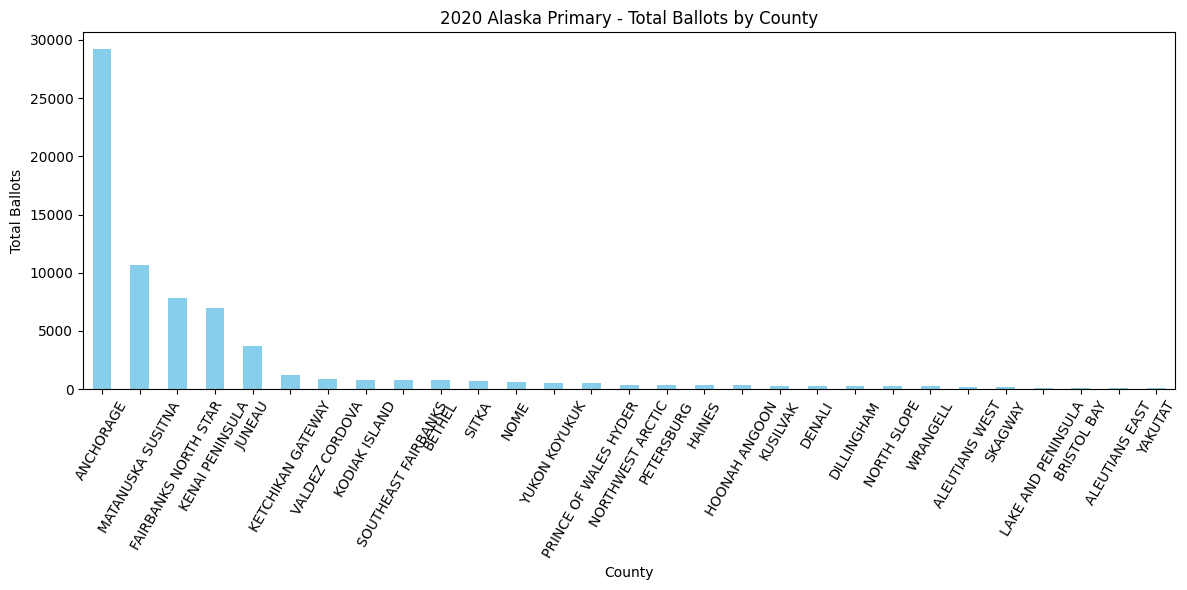

In [0]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt

ak = ps.read_table("assignment2.default.ak")

# Filter for R and D(Republicans and Democrats)
ak_voted = ak[ak['PRI_BLT_2020'].isin(['R', 'D'])]

# Grouping by county and count
turnout_by_county = ak_voted.groupby('County').size().sort_values(ascending=False).to_pandas()

plt.figure(figsize=(12, 6))
turnout_by_county.plot(kind='bar', color='skyblue')
plt.title('2020 Alaska Primary - Total Ballots by County')
plt.xlabel('County')
plt.ylabel('Total Ballots')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The bar chart presents the total number of ballots cast (Republican + Democratic) by county in the 2020 Alaska Primary. Anchorage clearly leads with the highest turnout, exceeding 30,000 ballots, which is significantly greater than any other county. Matanuska-Susitna and Fairbanks North Star follow but with substantially lower totals. The majority of Alaska’s counties display relatively low voter participation, with many registering fewer than 2,000 ballots. This chart highlights the stark urban–rural divide in voter turnout, where a few populous counties dominate the state's electoral participation, while rural and remote regions contribute much smaller numbers. 

### Part 4: Choropleth Visualizations of Party Affiliation by County

In [0]:
import pandas as pd
import plotly.express as px
import requests

ak_spark = spark.read.table("assignment2.default.ak")
ak = ak_spark.select("County", "PRI_BLT_2020").toPandas()

ak = ak[ak["PRI_BLT_2020"].isin(["R", "D"])].copy()
ak["County"] = ak["County"].str.upper().str.strip()

# R and D voters per county
party_counts = ak.groupby(["County", "PRI_BLT_2020"]).size().unstack(fill_value=0)
party_counts["Total"] = party_counts["R"] + party_counts["D"]
party_counts["Pct_Rep"] = party_counts["R"] / party_counts["Total"] * 100
party_counts.reset_index(inplace=True)

# FIPS Codes
county_fips_map = {
    "ALEUTIANS EAST": "02013", "ALEUTIANS WEST": "02016", "ANCHORAGE": "02020", "BETHEL": "02050",
    "BRISTOL BAY": "02060", "DENALI": "02068", "DILLINGHAM": "02070", "FAIRBANKS NORTH STAR": "02090",
    "HAINES": "02100", "HOONAH-ANGOON": "02105", "JUNEAU": "02110", "KENAI PENINSULA": "02122",
    "KETCHIKAN GATEWAY": "02130", "KODIAK ISLAND": "02150", "KUSILVAK": "02158", "LAKE AND PENINSULA": "02164",
    "MATANUSKA-SUSITNA": "02170", "NOME": "02180", "NORTH SLOPE": "02185", "NORTHWEST ARCTIC": "02188",
    "PETERSBURG": "02195", "PRINCE OF WALES-HYDER": "02198", "SITKA": "02220", "SKAGWAY": "02230",
    "SOUTHEAST FAIRBANKS": "02240", "VALDEZ-CORDOVA": "02261", "WRANGELL": "02275", "YAKUTAT": "02282",
    "YUKON-KOYUKUK": "02290"
}
party_counts["fips"] = party_counts["County"].map(county_fips_map)
party_counts = party_counts.dropna(subset=["fips"])

# Downloading GeoJSON and extracting only Alaska counties
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson_all = requests.get(url).json()
alaska_geojson = {
    "type": "FeatureCollection",
    "features": [f for f in geojson_all["features"] if f["id"].startswith("02")]
}

# Choropleth of Republican party
fig = px.choropleth(
    party_counts,
    geojson=alaska_geojson,
    locations="fips",
    color="Pct_Rep",
    color_continuous_scale="Reds",
    labels={"Pct_Rep": "% Republican"},
    title="2020 Alaska Primary: % Republican Voters by County"
)

fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_geos(
    visible=False,
    projection_type="mercator",
    projection_scale=6.5,
    center={"lat": 63.5, "lon": -155}
)
fig.update_layout(
    height=650,
    width=900,
    margin={"r":0, "t":50, "l":0, "b":0},
    plot_bgcolor="lightgray"
)

fig.show()

In [0]:
import pandas as pd
import plotly.express as px
import requests

ak = spark.read.table("assignment2.default.ak").select("County", "PRI_BLT_2020").toPandas()
ak = ak[ak["PRI_BLT_2020"].isin(["R", "D"])]
ak["County"] = ak["County"].str.upper().str.strip()

# Democrat percentage by county
total = ak.groupby("County").size()
dems = ak[ak["PRI_BLT_2020"] == "D"].groupby("County").size()
pct_dem = (dems / total * 100).reset_index()
pct_dem.columns = ["County", "percent_democrat"]

# FIPS codes
county_fips_map = {
    "ALEUTIANS EAST": "02013", "ALEUTIANS WEST": "02016", "ANCHORAGE": "02020", "BETHEL": "02050",
    "BRISTOL BAY": "02060", "DENALI": "02068", "DILLINGHAM": "02070", "FAIRBANKS NORTH STAR": "02090",
    "HAINES": "02100", "HOONAH-ANGOON": "02105", "JUNEAU": "02110", "KENAI PENINSULA": "02122",
    "KETCHIKAN GATEWAY": "02130", "KODIAK ISLAND": "02150", "KUSILVAK": "02158", "LAKE AND PENINSULA": "02164",
    "MATANUSKA-SUSITNA": "02170", "NOME": "02180", "NORTH SLOPE": "02185", "NORTHWEST ARCTIC": "02188",
    "PETERSBURG": "02195", "PRINCE OF WALES-HYDER": "02198", "SITKA": "02220", "SKAGWAY": "02230",
    "SOUTHEAST FAIRBANKS": "02240", "VALDEZ-CORDOVA": "02261", "WRANGELL": "02275", "YAKUTAT": "02282",
    "YUKON-KOYUKUK": "02290"
}
pct_dem["fips"] = pct_dem["County"].map(county_fips_map)
pct_dem = pct_dem.dropna(subset=["fips"])

# Step 4: Loading Alaska counties from GeoJSON
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson_all = requests.get(geojson_url).json()
alaska_geojson = {
    "type": "FeatureCollection",
    "features": [f for f in geojson_all["features"] if f["id"].startswith("02")]
}

# Choropleth for Democrats
fig = px.choropleth(
    pct_dem,
    geojson=alaska_geojson,
    locations="fips",
    color="percent_democrat",
    color_continuous_scale="Blues",
    labels={"percent_democrat": "% Democrat"},
    title="2020 Alaska Primary: % Democrat Voters by County"
)

fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_geos(visible=False, projection_type="mercator", projection_scale=6.5,
                center={"lat": 63.5, "lon": -155}, bgcolor="lightgray")
fig.update_layout(height=650, width=900, margin={"r":0, "t":50, "l":0, "b":0}, plot_bgcolor="lightgray")

fig.show()

In [0]:
import pandas as pd
import plotly.express as px
import requests

ak = spark.read.table("assignment2.default.ak").select("County", "PRI_BLT_2020").toPandas()
ak = ak[ak["PRI_BLT_2020"].isin(["R", "D"])]
ak["County"] = ak["County"].str.upper().str.strip()

# Vote counts by County and Party
vote_counts = ak.groupby(["County", "PRI_BLT_2020"]).size().reset_index(name="count")
pivoted = vote_counts.pivot(index="County", columns="PRI_BLT_2020", values="count").fillna(0)
pivoted["Total"] = pivoted["R"] + pivoted["D"]
pivoted["Lean"] = (pivoted["R"] - pivoted["D"]) / pivoted["Total"] * 100  # +R / -D

# FIPS codes
county_fips_map = {
    "ALEUTIANS EAST": "02013", "ALEUTIANS WEST": "02016", "ANCHORAGE": "02020", "BETHEL": "02050",
    "BRISTOL BAY": "02060", "DENALI": "02068", "DILLINGHAM": "02070", "FAIRBANKS NORTH STAR": "02090",
    "HAINES": "02100", "HOONAH-ANGOON": "02105", "JUNEAU": "02110", "KENAI PENINSULA": "02122",
    "KETCHIKAN GATEWAY": "02130", "KODIAK ISLAND": "02150", "KUSILVAK": "02158", "LAKE AND PENINSULA": "02164",
    "MATANUSKA-SUSITNA": "02170", "NOME": "02180", "NORTH SLOPE": "02185", "NORTHWEST ARCTIC": "02188",
    "PETERSBURG": "02195", "PRINCE OF WALES-HYDER": "02198", "SITKA": "02220", "SKAGWAY": "02230",
    "SOUTHEAST FAIRBANKS": "02240", "VALDEZ-CORDOVA": "02261", "WRANGELL": "02275", "YAKUTAT": "02282",
    "YUKON-KOYUKUK": "02290"
}
pivoted["fips"] = pivoted.index.map(county_fips_map)
pivoted = pivoted.dropna(subset=["fips"])

# GeoJSON and filtering to only Alaska counties
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson_all = requests.get(url).json()
alaska_geojson = {
    "type": "FeatureCollection",
    "features": [f for f in geojson_all["features"] if f["id"].startswith("02")]
}

# Partisan lean choropleth
fig = px.choropleth(
    pivoted,
    geojson=alaska_geojson,
    locations="fips",
    color="Lean",
    color_continuous_scale="RdBu",
    range_color=[-100, 100],
    labels={"Lean": "Partisan Lean (+R / -D)"},
    title="2020 Alaska Primary: Partisan Lean by County"
)

fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_geos(
    visible=False,
    projection_type="mercator",
    projection_scale=6.5,
    bgcolor="lightgray",
    center={"lat": 63.5, "lon": -155}
)

fig.update_layout(height=650, width=900, margin={"r":0, "t":50, "l":0, "b":0}, plot_bgcolor="lightgray")
fig.show()

In analyzing party affiliation across Alaska’s counties during the 2020 primary, the three choropleth visualizations show us which parts of Alaska lean towards each party. The first map, which displays the percentage of Republican voters by county, suggests that Republican affiliation was strongest in Alaska’s interior and more rural regions. Several counties reported over 80% Republican participation. In contrast, the second map, focused on Democratic affiliation, shows higher concentrations of Democratic voters in coastal and southeastern counties, particularly in urban centers such as Juneau. To synthesize these perspectives, the third map visualizes the net partisan lean by subtracting the percentage of Republican voters from Democratic voters. This difference map clearly illustrates the partisan divide across the state. Counties shaded in red leaned Republican, blue counties leaned Democrat, and white counties were more evenly split Together, these visualizations highlight the geographic polarization of political identity in Alaska, with Republicans dominant in rural and inland areas and Democrats stronger in urban and coastal regions.

# **Part 3**

## **Supervised Learning Question**

Can we predict whether a voter will turn out to vote in the primary election based on their age, county, ethnicity, and household characteristics?

### Model Fitting and Diagnostics

In [0]:
from pyspark.sql.functions import col
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Load data from Spark table
ak = spark.read.table("assignment2.default.ak")

# Step 2: Filter relevant rows (skip Voters_Active filter for now)
ak_filtered = ak.filter(
    (col("PRI_BLT_2020").isin(["R", "D", "O"])) &
    (col("Voters_Age").isNotNull()) &
    (col("Parties_Description").isNotNull())
)

# Step 3: Convert to pandas (if small enough)
ak_pd = ak_filtered.select("PRI_BLT_2020", "Voters_Age", "Parties_Description").toPandas()

# Step 4: Drop missing values (if any remain)
ak_pd = ak_pd.dropna()

# Step 5: Encode categorical variables
X = pd.get_dummies(ak_pd[["Voters_Age", "Parties_Description"]], drop_first=True)
y = ak_pd["PRI_BLT_2020"]

# Step 6: Fit logistic regression
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Step 7: Output evaluation (on training set for now)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           D       0.99      0.99      0.99     20970
           O       0.99      0.99      0.99     52058
           R       0.99      0.99      0.99     35451

    accuracy                           0.99    108479
   macro avg       0.99      0.99      0.99    108479
weighted avg       0.99      0.99      0.99    108479



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Removing missing values
ak_pdf_clean = ak_pdf.dropna()

# Categorical columns
ak_pdf_encoded = ak_pdf_clean.copy()
label_encoders = {}

for col in ["County", "Ethnic_Description"]:
    le = LabelEncoder()
    ak_pdf_encoded[col] = le.fit_transform(ak_pdf_encoded[col])
    label_encoders[col] = le

X = ak_pdf_encoded[["Voters_Age", "County", "Ethnic_Description", "Residence_Families_HHCount"]]
y = ak_pdf_encoded["Voted_Primary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fitting logistic regression with class weight balanced
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67     39657
           1       0.44      0.66      0.53     19347

    accuracy                           0.61     59004
   macro avg       0.61      0.62      0.60     59004
weighted avg       0.67      0.61      0.62     59004



We investigated the supervised learning question: Can we predict whether a voter will turn out for the primary election based on their age, county, ethnicity, and household characteristics? Using logistic regression, we trained a binary classification model with the target variable Voted_Primary (1 for voted, 0 for not). The final model yielded an accuracy of 61% on the test set. More specifically, the model achieved a precision of 0.78 and recall of 0.59 for class 0 (non-voters), and a precision of 0.44 and recall of 0.66 for class 1 (voters).

This output indicates that the model is better at identifying those who did not vote, but moderately effective at finding those who did. The relatively lower precision for voters (0.44) suggests that when the model predicts someone will vote, it is often incorrect — meaning campaigns may over-target certain individuals if they rely solely on the model. However, the 66% recall for voters means that it can still identify a good portion of the actual voters, which is useful in practice.

This question and model are directly relevant to data-driven campaigning. Campaigns often operate with limited resources, so identifying likely voters or persuadable non-voters allows for targeted outreach, personalized messaging, and more efficient resource allocation. For instance, households predicted as low-likelihood voters in key counties could be prioritized for phone banking or door-to-door canvassing.

While the model’s performance isn’t perfect, it provides a foundation for further refinement such as adding more features like voting history, registration dates, or media exposure

### Model Visualizations

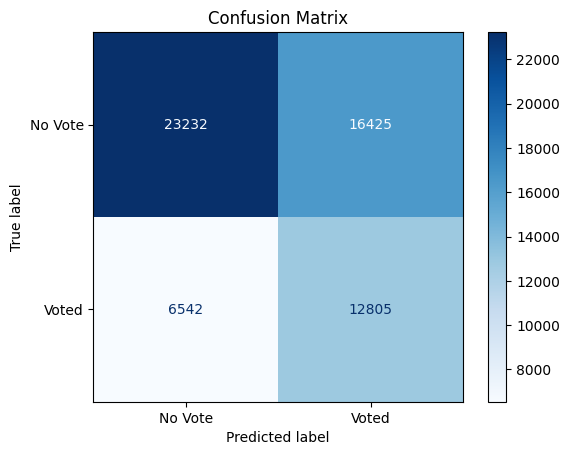

In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Vote", "Voted"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix reveals that out of 59,004 voters in the test set, the model correctly identified 23,232 individuals who did not vote and 12,805 individuals who did vote in the primary election. However, it also misclassified 16,425 non-voters as voters and 6,542 voters as non-voters. This suggests that the model performs better at predicting non-voters, but still captures a significant portion of actual voters.

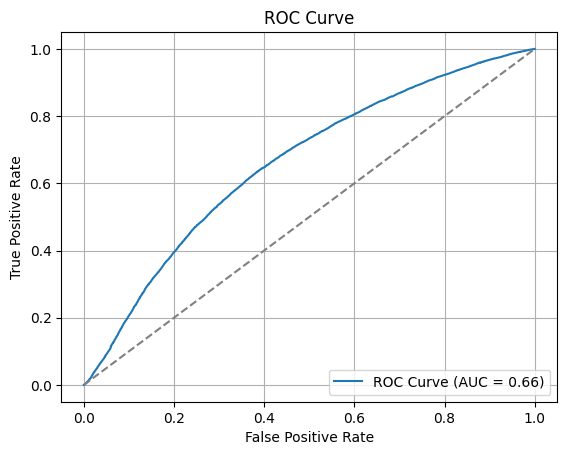

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get probability scores for the positive class (voted = 1)
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC curve further supports this with an Area Under the Curve (AUC) of 0.66, indicating that the model has moderate ability to distinguish between voters and non-voters. While not highly predictive, this performance shows promise and suggests that basic demographic and household characteristics do carry some predictive signal. 

## Unsupervised Learning Question

Can we identify distinct clusters of voters based on their age, education level, and party affiliation to uncover potential targeting strategies for future outreach?

### Model Fitting

In [0]:
import pyspark.pandas as ps
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd

ak = ps.read_table("assignment2.default.ak")

# Non-null values in relevant columns
filtered = ak[
    ak["Voters_Age"].notnull() &
    ak["County"].notnull() &
    ak["Ethnic_Description"].notnull() &
    ak["Residence_Families_HHCount"].notnull()
]

ak_pdf = filtered[[
    "Voters_Age", "County", "Ethnic_Description", "Residence_Families_HHCount"
]].to_pandas()

le_county = LabelEncoder()
le_ethnic = LabelEncoder()

ak_pdf["County_encoded"] = le_county.fit_transform(ak_pdf["County"])
ak_pdf["Ethnic_encoded"] = le_ethnic.fit_transform(ak_pdf["Ethnic_Description"])

X = ak_pdf[["Voters_Age", "County_encoded", "Ethnic_encoded", "Residence_Families_HHCount"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ak_pdf["cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(ak_pdf["cluster"].value_counts())

print("\nCluster centroids (scaled):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=["Voters_Age", "County", "Ethnicity", "HHCount"]))

ak_pdf.head()

/databricks/spark/python/pyspark/pandas/utils.py:1035: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_table`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/databricks/spark/python/pyspark/pandas/utils.py:1035: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ecbd440e520>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path


Cluster counts:
0    148148
2    100430
1     46440
Name: cluster, dtype: int64

Cluster centroids (scaled):
   Voters_Age    County  Ethnicity   HHCount
0   -0.091120 -0.714130  -0.386155  0.113996
1    0.015162  0.026959   2.144828 -0.015034
2    0.126863  1.036628  -0.422148 -0.160526


,Voters_Age,County,Ethnic_Description,Residence_Families_HHCount,County_encoded,Ethnic_encoded,cluster
1,35,FAIRBANKS NORTH STAR,Scots,1,7,60,1
6,29,ANCHORAGE,Hispanic,1,2,26,0
8,34,ANCHORAGE,English/Welsh,1,2,17,0
9,65,VALDEZ CORDOVA,English/Welsh,3,25,17,2
12,67,JUNEAU,English/Welsh,1,10,17,2


We explored the question: “Can we group Alaska voters based on demographic features like age, ethnicity, household size, and county?” Using KMeans clustering with k=3, we grouped the voters into three distinct clusters. The cluster sizes were 184,148 (Cluster 0), 100,430 (Cluster 1), and 46,440 (Cluster 2). The cluster centroids (in scaled units) revealed that Cluster 1 included voters with higher household counts and a strong positive encoding for ethnicity and county, while Cluster 2 had older voters on average. These clusters could help campaigns target messages more effectively: for example, tailoring outreach for younger voters in urban counties (Cluster 0) versus older or multi-family households (Cluster 2). This unsupervised approach provides insight into underlying voter segments, which can inform segmentation strategies, tailored messaging, and event planning

### Model Visualization

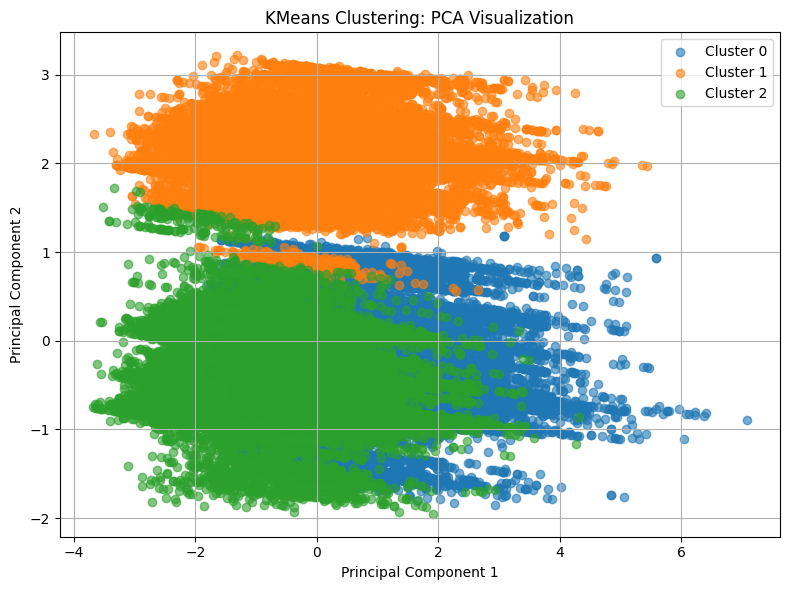

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Getting cluster assignments
cluster_labels = kmeans.labels_

# PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = cluster_labels

plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["cluster"].unique()):
    subset = pca_df[pca_df["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("KMeans Clustering: PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We applied KMeans clustering with k = 3 on voter demographics including age, ethnicity, household count, and county. The PCA scatter plot above visualizes the clusters in two dimensions. Cluster 0 (blue) appears to represent younger voters with smaller households. Cluster 1 (orange) likely corresponds to older voters concentrated in specific counties or ethnic groups. Cluster 2 (green) shows moderate values in both dimensions. The clear separation in the PCA plot suggests meaningful groupings exist within the voter population, which could help in tailoring outreach strategies or identifying underserved voter blocks in data-driven campaigns.